In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train_data.csv')
test = pd .read_csv('test_data.csv')

<h3>Combine train and test for analyzing data</h3>

In [4]:
atrain = train.drop(['Loan_Status'],axis=1)

In [5]:
combine = atrain.append(test)
combine.describe().transpose()

/root/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Application_ID,614.0,1999.785016,567.097644,1002.0,1532.75,1993.5,2476.75,2990.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,NaN,NaN,NaN,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,NaN,NaN,NaN,480.0
Credit_History,564.0,0.842199,0.364878,0.0,NaN,NaN,NaN,1.0


In [6]:
combine['LoanAmount'].isnull().sum()

22

Filling missing values of LoanAmount using ApplicatIncome.
1.As we can see that there are Some Outliers in the income (i.e some applicant have high loan amount)
2.We can use linearRegression to predict loan amount based on applicantincome so its good to remove  outliers

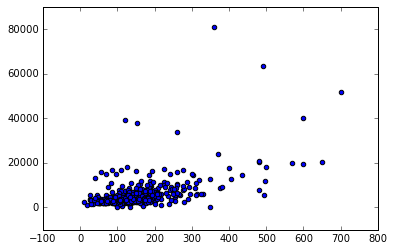

In [7]:
plt.scatter(combine['LoanAmount'],combine['ApplicantIncome'])

In [8]:
misloan = combine[combine.LoanAmount.isnull()]
preloanamount = combine[(combine.ApplicantIncome < 25000) & (combine.LoanAmount.notnull())]

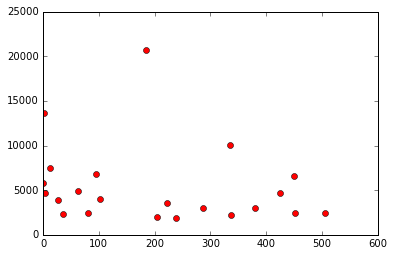

In [9]:
plt.plot(misloan['ApplicantIncome'],'ro')

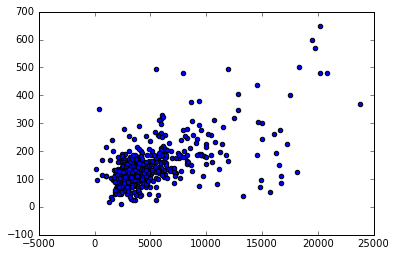

In [10]:
plt.scatter(preloanamount.ApplicantIncome,preloanamount.LoanAmount)

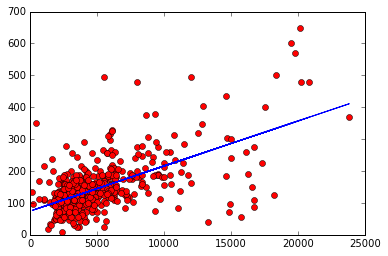

In [11]:
reg = linear_model.LinearRegression()
reg.fit (preloanamount['ApplicantIncome'].reshape(len(preloanamount),1),preloanamount['LoanAmount'].reshape(len(preloanamount),1))
plt.plot(preloanamount.ApplicantIncome,preloanamount.LoanAmount,'ro',preloanamount.ApplicantIncome,preloanamount.ApplicantIncome.reshape(len(preloanamount),1)*reg.coef_+reg.intercept_)

In [12]:
filoan = reg.predict(misloan.ApplicantIncome.reshape(len(misloan),1))
combine.loc[combine.LoanAmount.isnull(),'LoanAmount'] = filoan.astype('int64').astype('float64').reshape(22,)

In [13]:
combine.Loan_Amount_Term.fillna(stats.mode(combine.Loan_Amount_Term.astype('category'))[0][0].astype('float64'),inplace=True)

In [14]:
combine.Credit_History.fillna(stats.mode(combine.Credit_History.astype('category'))[0][0].astype('float64'),inplace=True)

In [15]:
combine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Application_ID,614.0,1999.785016,567.097644,1002.0,1532.75,1993.5,2476.75,2990.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.545603,84.853566,9.0,100.00,128.0,168.00,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [16]:
combine.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1002,M,No,0,Graduate,No,5849,0.0,157.0,360.0,1.0,Urban
1,1003,M,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,1005,M,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,1006,M,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,1008,M,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [17]:
combine.Gender.fillna(stats.mode(combine.Gender)[0][0],inplace=True)
combine.Married.fillna(stats.mode(combine.Married)[0][0],inplace=True)
combine.Dependents.fillna(stats.mode(combine.Dependents)[0][0],inplace=True)
combine.Education.fillna(stats.mode(combine.Education)[0][0],inplace=True)
combine.Self_Employed.fillna(stats.mode(combine.Self_Employed)[0][0],inplace=True)
combine.Property_Area.fillna(stats.mode(combine.Property_Area)[0][0],inplace=True)

/root/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [18]:
combine.isnull().sum()

Application_ID       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [19]:
pro_train = combine[:][0:len(train)]
pro_test =combine[:][len(train):]

In [20]:
#pro_train= pd.concat([pro_train,train.Loan_Status],axis=1)
pro_train = pd.get_dummies(pro_train)
pro_test=pd.get_dummies(pro_test)

In [21]:
from sklearn import svm
target = pd.get_dummies(train.Loan_Status)

In [22]:
model = svm.SVC(kernel='linear', C=1, gamma=1) 

In [23]:
model.fit(pro_train,target.Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
model.score(pro_train,target.Y)

0.81999999999999995

In [25]:
predicted = model.predict(pro_test)

In [26]:
Loan_Status = ['Y' if i == 1.0 else 'N' for i in predicted]

In [44]:
final = pd.DataFrame({
    'Application_ID':list(pro_test.Application_ID),
    'Loan_Status': list(Loan_Status)
})

In [46]:
final.to_csv('svm1.csv',index=False,quoting=False)